<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset-Background-Information" data-toc-modified-id="Dataset-Background-Information-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset Background Information</a></span></li><li><span><a href="#Preliminary-Questions" data-toc-modified-id="Preliminary-Questions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preliminary Questions</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Process-Data" data-toc-modified-id="Process-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Process Data</a></span></li><li><span><a href="#Explore-Data" data-toc-modified-id="Explore-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Explore Data</a></span></li><li><span><a href="#Investigate" data-toc-modified-id="Investigate-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Investigate</a></span></li></ul></div>

Describe your dataset. Describe and explore your dataset in the initial section of your Report. 

Ask and answer analytic questions. Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

Propose further research. Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer.

See this recent analysis on 2016 celebrity deaths for an excellent example of data-driven story telling that presents a problem, explores data, and produces an answer. The analytics are more robust techniques than we've covered so far, but the general idea and tone are spot on.

Report guidelines
Keep these guidelines in mind as you draft your Report:

Length. Your Report should be three to five pages long with visualizations. Short and clear is better than long and opaque.
Structure. Pay attention to the narrative structure of your Report. Each section should flow into the next and make a logical, readable text. Don't simply create a list of bullet points or present code without explanation.


Once you've loaded your data, dig around with pandas and matplotlib to explore it. What variables does your data contain and what distributions do you think they have? Does the data bear on the preliminary questions you wrote down? What new questions might you answer? How does the data look when you plot it out?

At this point you should be ready to start writing your Report. Decide what format to use, which three analytic questions you'll ask and answer, which research questions you'd like to ask and which data science techniques might be appropriate to answering them. If necessary, do independent research now about the field of data science, or discuss the topic with your mentor, to decide which potential techniques you could use.

Use at least 2-3 different types of charts to display the data.
Be clear about any assumptions you make about the data and validate those assumptions if possible.
Ensure that your dataset actually has the information to answer the questions you're asking. Does the dataset have a bias? Is it incomplete? Problems with your dataset can easily lead to problems in your analysis if you don't address them.
Assignment
When you're ready, submit your final Report at the bottom of this page. Try to have a final discussion with your mentor about your work before you present your capstone.

# Dataset Background Information

What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.

"Young People Survey," is the title of the dataset I investigated. The author of this dataset, Miroslav Sabo, created this 2013 dataset that documented 1,010 people's answers to a 150 question survey. As said in the title, the population of this survey revolved around younger people specifically between the ages of 15 and 30 inclusive. The survey questions are broken up into 9 categories: Music preferences, Movie preferences, Hobbies & interests, Phobias, Health habits, Personality traits, views on life & opinions, Spending habits, and Demographics.

The personality traits section of the survey sparked my interest to investigate this dataset. Some of the questions were very personal and are likely to be seen on a mental health survey. Here are some examples: "I wish I could change the past because of the things I have done. I will find a fault in myself if people don't like me. I feel lonely in life." I was curious to find out if there are any similarities between people who answered yes to these personal questions. This ultimately lead me to my first preliminary question.


# Preliminary Questions


Are people in the city more lonely than people in rural areas?

What do lonely people generally have in common?

Is there a correlation between loneliness and internet usauge?


# Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from collections import Counter
import seaborn as sns
%matplotlib inline

In [10]:
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

In [11]:
col_data = pd.read_csv('young-people-survey/columns.csv')
response_data = pd.read_csv('young-people-survey/responses.csv')

In [12]:
response_data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

# Process Data

In [13]:
features_to_remove = ['Left - right handed', 'Education', 
                      'House - block of flats', 'Number of siblings', 
                      'Questionnaires or polls', 'Pets', 'Flying',
                      'Storm','Darkness','Heights','Spiders','Snakes',
                      'Rats','Ageing','Dangerous dogs','Fear of public speaking']
response_data.drop(features_to_remove, axis = 1, inplace = True)
print("Columns: {}".format(len(response_data.columns)))

Columns: 134


# Explore Data

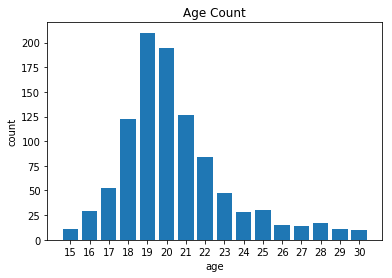

In [14]:
age = response_data.Age.value_counts().keys()
age = list(np.int_(age))
age_count = response_data.Age.value_counts().values

plt.bar(age, age_count)
plt.title('Age Count')
plt.xlabel('age')
plt.ylabel('count')
plt.xticks(age)
plt.show()

In [18]:
mental_health_df = response_data.copy()

mental_health_df.drop(test_df.select_dtypes(['object','int64']), axis = 1, inplace = True)
non_mental_col = ['Music', 'Slow songs or fast songs', 'Dance',
 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 
 'Latino', 'Techno, Trance', 'Opera', 'Movies','Horror', 'Thriller', 'Comedy', 'Romantic',
 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary','Western', 'Action', 'History',
 'Psychology', 'Politics', 'Mathematics', 'Physics', 'PC', 'Economy Management', 'Biology', 'Chemistry',
 'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Finding lost valuables',
 'Science and technology', 'Passive sport', 'Daily events']
mental_health_df.drop(non_mental_col, axis = 1, inplace = True)

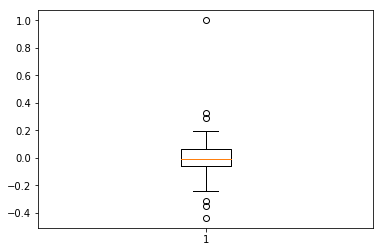

In [19]:
#correlation between loneliness and other features

corr = pd.DataFrame(mental_health_df.corr())

plt.boxplot(corr.Loneliness)
plt.show()

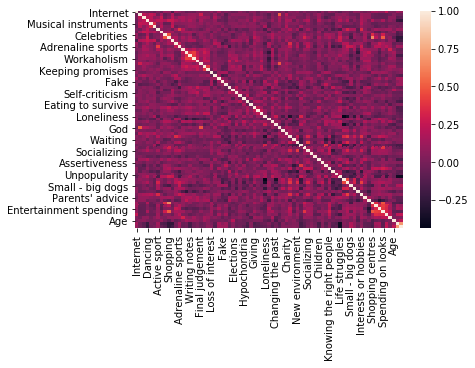

In [20]:
sns.heatmap(mental_health_df.corr())

# Investigate

In [ ]:
response_data['internet_usage'] = response_data['Internet usage']

internet_use_map = {'no time at all': 0,
                    'less than an hour a day': 1,
                    'few hours a day':2,
                    'most of the day': 3}

response_data['internet_use_code'] = response_data.internet_usage.map(internet_use_map)

sns.catplot(x= 'Loneliness', col="internet_use_code",
            data=response_data, kind="count",
               height=4, aspect=.5);


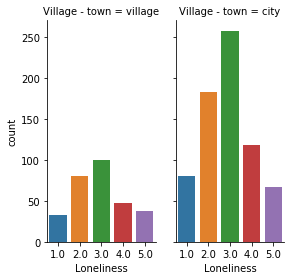

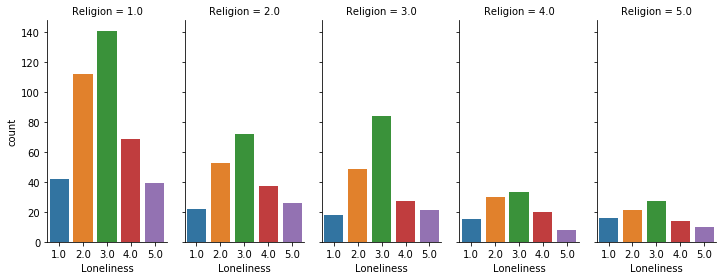

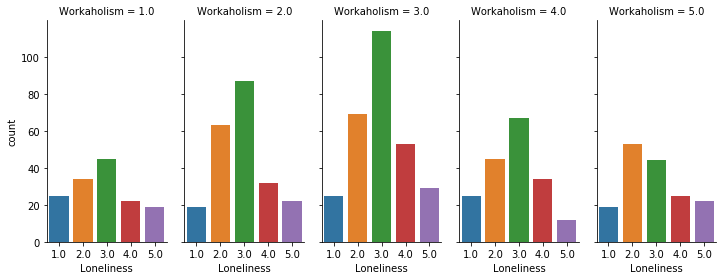

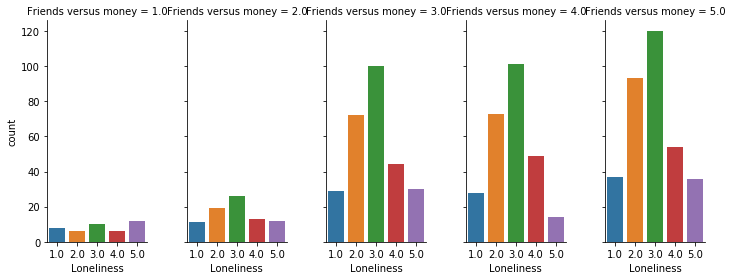

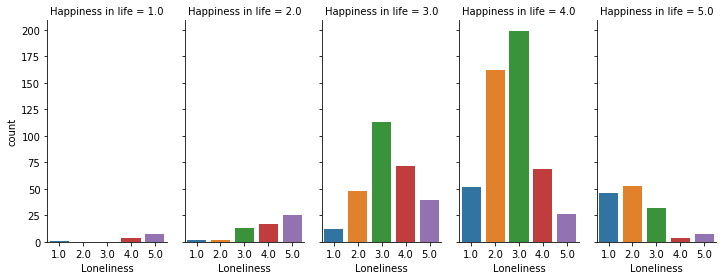

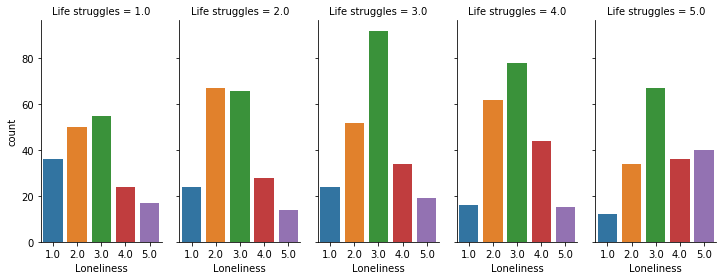

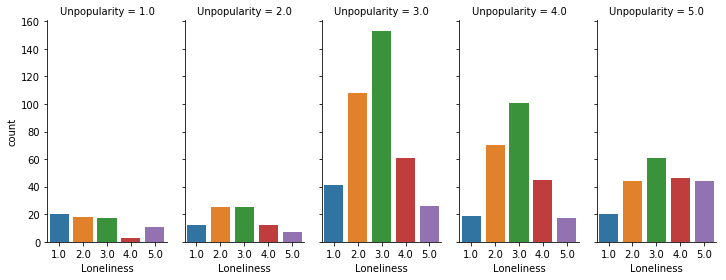

In [34]:

sns.catplot(x= 'Loneliness', col= 'Village - town',
            data=response_data, kind="count",
               height=4, aspect=.5);


#scatterplot weight or height with loneliness

sns.catplot(x= 'Loneliness', col= 'Religion',
            data=response_data, kind="count",
               height=4, aspect=.5);

sns.catplot(x= 'Loneliness', col= 'Workaholism',
            data=response_data, kind="count",
               height=4, aspect=.5);

sns.catplot(x= 'Loneliness', col= 'Friends versus money',
            data=response_data, kind="count",
               height=4, aspect=.5);


sns.catplot(x= 'Loneliness', col= 'Happiness in life',
            data=response_data, kind="count",
               height=4, aspect=.5);

sns.catplot(x= 'Loneliness', col= 'Life struggles',
            data=response_data, kind="count",
               height=4, aspect=.5);



sns.catplot(x= 'Loneliness', col= 'Unpopularity',
            data=response_data, kind="count",
               height=4, aspect=.5);


Idea:

Using NLP sentiment analysis for journaling. As a person journals the model will indenfiy keypoints from the journal or ask custom followup questions to the person to help the person clarify their thoughts or the event explained. Creates a monthly or weekly analysis of the words or subjects talked about within the time frame giving statistics. Asked the person how they feel about the thing they talked about last week. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminary-Questions" data-toc-modified-id="Preliminary-Questions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminary Questions</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Process-Data" data-toc-modified-id="Process-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Process Data</a></span></li><li><span><a href="#Explore-Data" data-toc-modified-id="Explore-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Explore Data</a></span></li><li><span><a href="#Investigate" data-toc-modified-id="Investigate-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Investigate</a></span></li></ul></div>